2.4 PA Data Cleaning and Visualization Using Python 
06 Feb 2026
Student ID: AEOTOR0246

In [1]:
from IPython.display import display, Markdown
from datetime import datetime
import pandas as pd #import pandas library
todays_date = datetime.now().strftime("%Y-%m-%d")
student_id = "AEOTOR0246"
file_path = r"C:\Users\Student\Downloads\AirBnBSummary_v2.xlsx"
df = pd.read_excel(file_path)
duplicate_rows_before = df[df.duplicated()] #find duplicated rows
display(Markdown(f"### {student_id} – {todays_date}")) #display Header Text
display(Markdown("## Duplicate Rows before cleaning")) #display Header Text
display(duplicate_rows_before) #display # of duplicated rows
df_cleaned = df.copy() #Make copy of data frame
df_cleaned.drop_duplicates(inplace=True) #delete duplicates
duplicate_rows_after = df_cleaned[ df_cleaned.duplicated()] #find duplicated rows
display(Markdown("## Duplicate Rows after cleaning")) #display Header Text
display(duplicate_rows_after) #display rows after cleaning

### AEOTOR0246 – 2026-02-06

## Duplicate Rows before cleaning

,id,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365,<StudentID>
1775,27252097,205256572,Stephanie,West Olentangy,Entire home/apt,296.0,1,164,167.0,AEOTOR0246
1776,28640445,181661236,Chris,West Olentangy,Entire home/apt,105.0,2,280,170.0,AEOTOR0246
1777,620815000000000000,453019578,Devon,West Olentangy,Entire home/apt,99.0,15,3,65.0,AEOTOR0246
1778,620918000000000000,453019578,Devon,West Olentangy,Entire home/apt,90.0,30,1,0.0,AEOTOR0246


## Duplicate Rows after cleaning

,id,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365,<StudentID>


In [2]:
#finding Missing Values
missing_values_before = df.isnull().sum()
display(Markdown(f"## {student_id} – {todays_date}")) #display HeaderText
display(Markdown("## Number of missing values in each column"))
display(missing_values_before)

#Fill in missing values with the median of the row. Median because it is less sensitive to outliers
for col in missing_values_before.index:
    if missing_values_before[col] > 0:
        median_value = df_cleaned[col].median() #Get the median of the column where the missing value is
        df_cleaned[col].fillna(median_value, inplace=True) #Fill the missing value with the median
missing_values_after = df_cleaned.isnull().sum()

display(Markdown("## Number of missing values in each column after filling with median"))
display(missing_values_after)

## AEOTOR0246 – 2026-02-06

## Number of missing values in each column

id                   0
host_id              0
host_name            0
neighbourhood        0
room_type            0
price                4
minimum_nights       0
number_of_reviews    0
availability_365     5
<StudentID>          0
dtype: int64

C:\Users\Student\AppData\Local\Temp\ipykernel_1308\1871716841.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_value, inplace=True) #Fill the missing value with the median
C:\Users\Student\AppData\Local\Temp\ipykernel_1308\1871716841.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

## Number of missing values in each column after filling with median

id                   0
host_id              0
host_name            0
neighbourhood        0
room_type            0
price                0
minimum_nights       0
number_of_reviews    0
availability_365     0
<StudentID>          0
dtype: int64

In [3]:
#Finding Outliers using 3.5 * IQR method
outliers = {}
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns #Find numerical data types

for col in numerical_columns:
    Q1 = df_cleaned[col].quantile(0.25) #Calculate Q1
    Q3 = df_cleaned[col].quantile(0.75) #Calculate Q3
    IQR = Q3 - Q1
    outliers[col] = df_cleaned[(df_cleaned[col] < (Q1 - 3.5 * IQR)) | (df_cleaned[col] > (Q3 + 3.5 * IQR))]

display(Markdown(f"## {student_id} - {todays_date}")) #display Header text
display(Markdown("## Outliers"))
for col, outlier_df in outliers.items():
    if not outlier_df.empty:
        display(Markdown(f"**{col}:**"))
        display(outlier_df[col])

display(Markdown("**After cleaning:**"))
for col in outliers.keys():
    if not outliers[col].empty:
        median_value = df_cleaned[col].median()
        outlier_indices = outliers[col].index
        df_cleaned.loc[outlier_indices, col] = median_value
        display(Markdown(f"**{col}:**"))
        display(df_cleaned.loc[outlier_indices, col])

## AEOTOR0246 - 2026-02-06

## Outliers

**price:**

51       671.0
190      545.0
296      500.0
301      900.0
331      615.0
354      629.0
410      848.0
455      704.0
523      975.0
563      980.0
621      883.0
631      556.0
688      794.0
696      880.0
697     1015.0
806      591.0
808      880.0
811      841.0
822      736.0
878      560.0
879      639.0
881      616.0
884      570.0
929      599.0
951      507.0
991      496.0
1032     980.0
1058     595.0
1097     490.0
1104     589.0
1113     777.0
1114    1171.0
1116     771.0
1135     621.0
1163     585.0
1316     494.0
1402     500.0
1566     507.0
1605     494.0
1638     582.0
1740     500.0
1759     567.0
1760     568.0
1774     594.0
Name: price, dtype: float64

**minimum_nights:**

0       30
14      30
20      30
23      30
24      30
        ..
1758    30
1764    30
1765    30
1769    30
1771    30
Name: minimum_nights, Length: 281, dtype: int64

**number_of_reviews:**

2       309
174     288
175     396
178     661
179     629
182     274
200     644
214     310
217     406
225     299
464     669
466     317
475     421
478     423
483     390
487     785
492     282
494     478
496     484
499     385
503     400
505     435
510     344
518     327
520     665
521     280
522     304
529     325
530     333
531     446
534     660
540     360
545     288
548     324
550     340
555     300
564     523
586     289
594     274
595     293
597     286
600     277
620     358
656     407
677     361
701     353
1270    527
1277    345
1279    330
1280    438
1285    555
1287    341
1297    315
1320    294
1321    379
1703    309
1705    279
1706    278
1708    325
1711    280
Name: number_of_reviews, dtype: int64

**After cleaning:**

**price:**

51      115.0
190     115.0
296     115.0
301     115.0
331     115.0
354     115.0
410     115.0
455     115.0
523     115.0
563     115.0
621     115.0
631     115.0
688     115.0
696     115.0
697     115.0
806     115.0
808     115.0
811     115.0
822     115.0
878     115.0
879     115.0
881     115.0
884     115.0
929     115.0
951     115.0
991     115.0
1032    115.0
1058    115.0
1097    115.0
1104    115.0
1113    115.0
1114    115.0
1116    115.0
1135    115.0
1163    115.0
1316    115.0
1402    115.0
1566    115.0
1605    115.0
1638    115.0
1740    115.0
1759    115.0
1760    115.0
1774    115.0
Name: price, dtype: float64

**minimum_nights:**

0       2
14      2
20      2
23      2
24      2
       ..
1758    2
1764    2
1765    2
1769    2
1771    2
Name: minimum_nights, Length: 281, dtype: int64

**number_of_reviews:**

2       19
174     19
175     19
178     19
179     19
182     19
200     19
214     19
217     19
225     19
464     19
466     19
475     19
478     19
483     19
487     19
492     19
494     19
496     19
499     19
503     19
505     19
510     19
518     19
520     19
521     19
522     19
529     19
530     19
531     19
534     19
540     19
545     19
548     19
550     19
555     19
564     19
586     19
594     19
595     19
597     19
600     19
620     19
656     19
677     19
701     19
1270    19
1277    19
1279    19
1280    19
1285    19
1287    19
1297    19
1320    19
1321    19
1703    19
1705    19
1706    19
1708    19
1711    19
Name: number_of_reviews, dtype: int64

In [4]:
cleaned_file_path_35 = r"C:\Users\Student\Downloads\AirBnBSummary_v2.xlsx"
df_cleaned.to_excel(cleaned_file_path_35, index=False)

In [7]:
from datetime import datetime
import pandas as pd
from IPython.display import display, Markdown

df_new = pd.read_excel(r"C:\Users\Student\Downloads\AirBnBSummary_v2.xlsx")

df_new.columns = df_new.columns.str.strip()

todays_date = datetime.now().strftime("%Y-%m-%d")
student_id = "AEOTOR0246"

display(Markdown(f"### {student_id} – {todays_date}"))

mean_price = df_new['price'].mean()
std_price = df_new['price'].std()
median_price = df_new['price'].median()
min_price = df_new['price'].min()
max_price = df_new['price'].max()

correlation_price_availability = df_new['price'].corr(df_new['availability_365'])

print("Mean Price:", mean_price)
print("Standard Deviation of Price:", std_price)
print("Median Price:", median_price)
print("Minimum Price:", min_price)
print("Maximum Price:", max_price)
print("Correlation between Price and Availability:", correlation_price_availability)


### AEOTOR0246 – 2026-02-06

Mean Price: 134.5261971830986
Standard Deviation of Price: 79.04019260639075
Median Price: 115.0
Minimum Price: 20
Maximum Price: 489
Correlation between Price and Availability: 0.1079996677473534


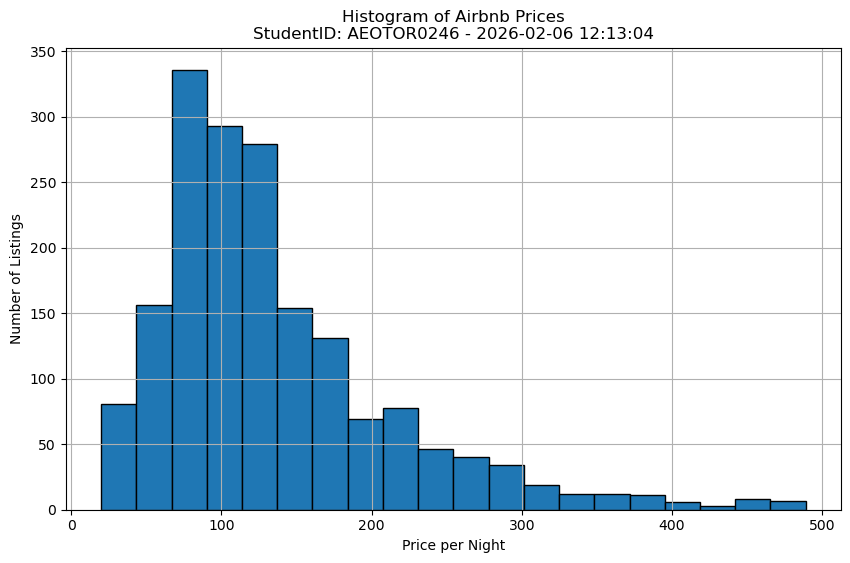

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

student_id = "AEOTOR0246"
df_new = pd.read_excel(r"C:\Users\Student\Downloads\AirBnBSummary_v2.xlsx")

df_new.columns = df_new.columns.str.strip()
current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
plt.figure(figsize=(10, 6))
plt.hist(df_new['price'], bins=20, edgecolor='black')
plt.xlabel('Price per Night')
plt.ylabel('Number of Listings')
plt.title(f'Histogram of Airbnb Prices\nStudentID: {student_id} - {current_datetime}')
plt.grid(True)
plt.show()


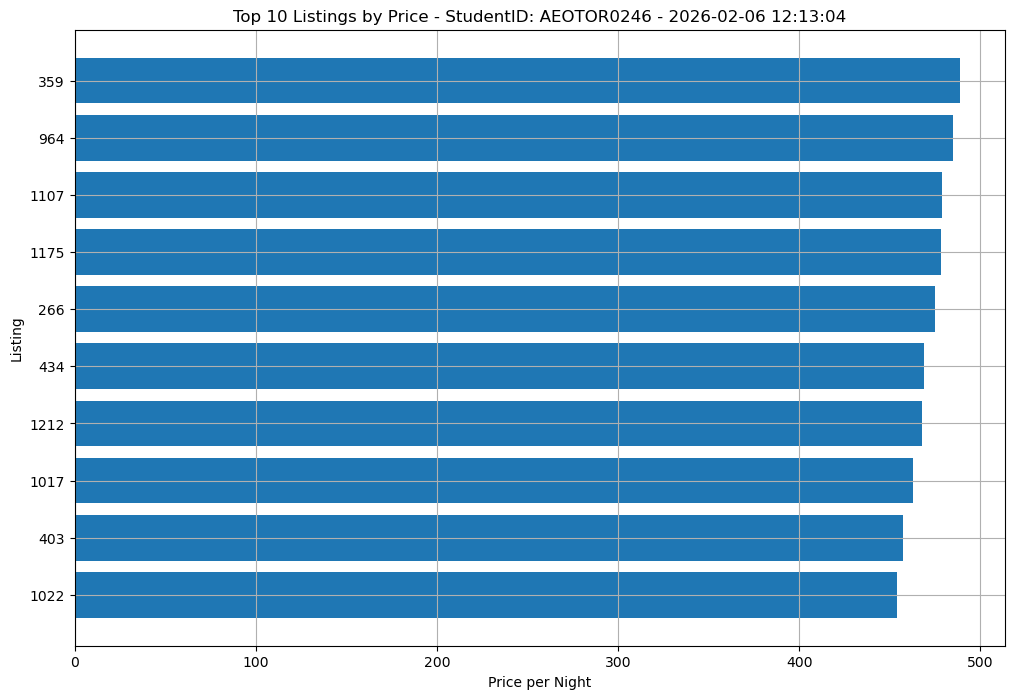

In [10]:
top_10_listings = df_new.nlargest(10, 'price')

y_pos = range(len(top_10_listings))

plt.figure(figsize=(12, 8))
plt.barh(y_pos, top_10_listings['price'])

plt.yticks(y_pos, top_10_listings.index)
plt.xlabel('Price per Night')
plt.ylabel('Listing')
plt.title(
    f'Top 10 Listings by Price - StudentID: {student_id} - {current_datetime}'
)

plt.gca().invert_yaxis()
plt.grid(True)
plt.show()




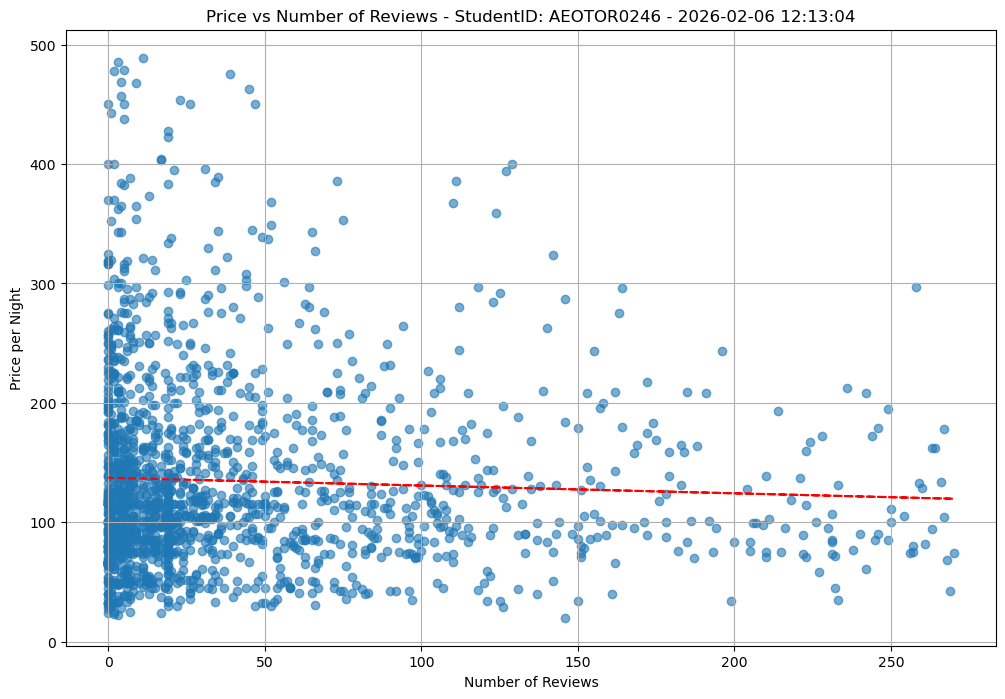

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(df_new['number_of_reviews'], df_new['price'], alpha=0.6)
m, b = np.polyfit(df_new['number_of_reviews'], df_new['price'], 1)
plt.plot(df_new['number_of_reviews'], m * df_new['number_of_reviews'] + b, linestyle='--', color='red')
plt.xlabel('Number of Reviews')
plt.ylabel('Price per Night')
plt.title(f'Price vs Number of Reviews - StudentID: {student_id} - {current_datetime}')
plt.grid(True)
plt.show()



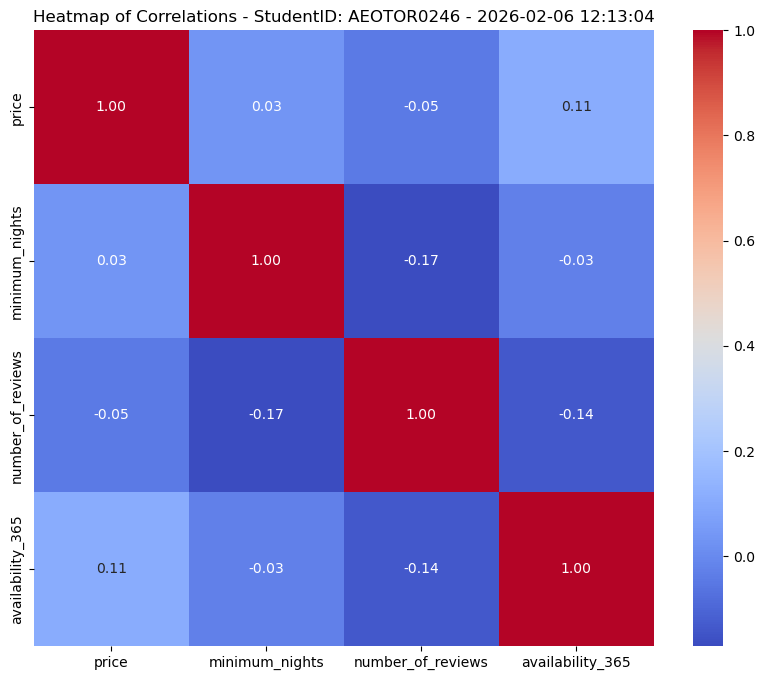

In [15]:
selected_columns = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']
correlation_matrix = df_new[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Heatmap of Correlations - StudentID: {student_id} - {current_datetime}')
plt.show()
